# **Web Server Log Analysis - Calgary HTTP Dataset**

Dataset Information - The Calgary HTTP dataset, which contains
approximately one year's worth of HTTP requests to the University of Calgary's
Computer Science web server.

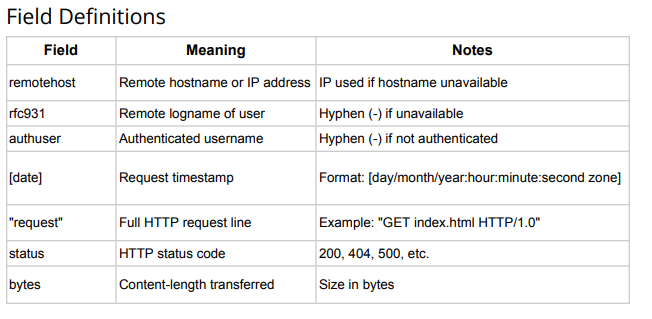

Lets we now extract meaningful insights and demonstrate your Python data analysis skills from real-world web server.

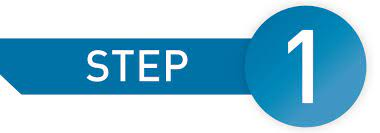

Data loading, cleaning, and exploration.

In [1]:
import urllib.request

url = "ftp://ita.ee.lbl.gov/traces/calgary_access_log.gz"
output_file = "calgary_access_log.gz"

urllib.request.urlretrieve(url, output_file)
print("Download completed!")

Download completed!


In [2]:
# imports
import gzip
import re
from datetime import datetime
from collections import defaultdict, Counter
import pandas as pd


# Here we now Load the dataset
logfilepath = r"calgary_access_log.gz" # Changed path to match the extracted file location

loglines = []

# Specify encoding when opening the gzipped file
with gzip.open(logfilepath, 'rt', encoding = 'latin-1', errors = 'ignore') as f:
    for line in f:
        loglines.append(line.strip())

print(f"Total lines loaded: {len(loglines)}") # Corrected variable name

#parse function
# Corrected typo: re.compile instead of re.complile
log_pattern = re.compile(
    r'^(?P<host>\S+) (?P<rfc931>\S+) (?P<authuser>\S+) \[(?P<datetime>[^\]]+)\] '
    r'"(?P<request>[^"]*)" (?P<status>\d{3}) (?P<bytes>\S+)' # Added closing parenthesis and corrected variable name
)

def parse_line(line):
  match = log_pattern.match(line)
  if not match:
    return None
  data = match.groupdict()
  try:
    data['datetime'] = datetime.strptime(data['datetime'], "%d/%b/%Y:%H:%M:%S %z")
  except ValueError:
    return None
  data['method'], data['filename'], data['protocol'] = ('', '', '')
  if data['request']:
    request_parts = data['request'].split()
    if len(request_parts) == 3:
      data['method'], data['filename'], data['protocol'] = request_parts # Corrected variable name
    data['status'] = int(data['status'])
    data['bytes'] = int(data['bytes']) if data['bytes'].isdigit() else 0
    data['extension'] = data['filename'].split('.')[-1] if '.' in data['filename'] else '' # Corrected variable name and dictionary access
    return data # Moved return inside the if block


# Ensure log_lines is defined before this block
parsed_data = [parse_line(line) for line in loglines] # Corrected variable name
clean_data = [entry for entry in parsed_data if entry]

df = pd.DataFrame(clean_data)
print(df.head()) # Added parentheses to call the head() method

Total lines loaded: 726739
    host rfc931 authuser                   datetime                  request  \
0  local      -        -  1994-10-24 13:41:41-06:00  GET index.html HTTP/1.0   
1  local      -        -  1994-10-24 13:41:41-06:00       GET 1.gif HTTP/1.0   
2  local      -        -  1994-10-24 13:43:13-06:00  GET index.html HTTP/1.0   
3  local      -        -  1994-10-24 13:43:14-06:00       GET 2.gif HTTP/1.0   
4  local      -        -  1994-10-24 13:43:15-06:00       GET 3.gif HTTP/1.0   

   status  bytes method    filename  protocol extension  
0     200    150    GET  index.html  HTTP/1.0      html  
1     200   1210    GET       1.gif  HTTP/1.0       gif  
2     200   3185    GET  index.html  HTTP/1.0      html  
3     200   2555    GET       2.gif  HTTP/1.0       gif  
4     200  36403    GET       3.gif  HTTP/1.0       gif  


In [3]:
print(df.columns)

Index(['host', 'rfc931', 'authuser', 'datetime', 'request', 'status', 'bytes',
       'method', 'filename', 'protocol', 'extension'],
      dtype='object')


In [16]:
#For Saving Dataframe as CSV file from Google Colab to Drive
#step 1:  Importing Necessary libraries
from google.colab import drive

In [17]:
#step 2: Mounting Google Drive - this will log in to your google account and authorize Google Colab to paste back into your colab notebook.

drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#step 3: Exporting a DataFrame to CSV - we ready to export our DataFrame to a CSV file.
df.to_csv('/content/drive/My Drive/calgary_access_log.csv',index=False)
print("Dataframe saved.. to calgary_access_log.csv")

Dataframe saved.. to calgary_access_log.csv


In [21]:
#step 4: Verifying the Export -You can see the file is created and file's presence at the panel on the left of the Colab Notebook.
df_verify = pd.read_csv('/content/drive/My Drive/calgary_access_log.csv')

<ipython-input-21-ae558c5b7f39>:2: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_verify = pd.read_csv('/content/drive/My Drive/calgary_access_log.csv')


calgary_access_log.csv **Download** the file for Dashboard Design purpose in Power BI

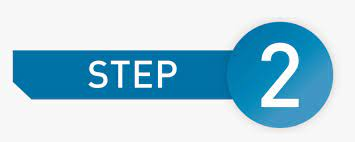

## Part 2: Analysis Questions

### Instructions

* Implement each function according to its docstring specifications
* Use the cleaned data you prepared in Part 1
* Ensure your functions return the exact data types specified
* Test your functions to verify they work correctly
* You may add helper functions, but keep the main function signatures unchanged


### Q1: Count of total log records

In [5]:
#Count of total log records
query_result1 = len(df)
print("Answer for Q1: Count of total log records",query_result1)

Answer for Q1: Count of total log records 724836


### Q2: Count of unique hosts


In [6]:
# Count of unique hosts
query_result2 = df['host'].nunique()
print("Answer for Q2: Count of unique hosts:",query_result2)

Answer for Q2: Count of unique hosts: 2


### Q3: Date-wise unique filename counts

In [7]:
# Date-wise unique filename counts
# First, ensure 'datetime' column is in decimal format
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

#Now you can safely use .dt
df['date_str'] = df['datetime'].dt.strftime('%d-%b-%Y')

#Group by date and count unique filename
query_result3 = df.groupby('date_str')['filename'].nunique().to_dict()

#Previw result
for date, count in list(query_result3.items())[:5]:
  print(f"{date}: {count}")


01-Aug-1995: 670
01-Jul-1995: 388
01-Jun-1995: 591
01-May-1995: 467
01-Oct-1995: 553


### Q4: Number of 404 response codes


In [8]:
# Number of 404 response codes

query_result4 = len(df[df['status'] == 404])
print("Answer for Q4: Number of 404 response codes:", query_result4)

Answer for Q4: Number of 404 response codes: 23517


### Q5: Top 15 filenames with 404 responses

In [9]:
# Top 15 filenames with 404 responses

query_result5 = df[df['status'] == 404]['filename'].value_counts().head(15).to_dict()
print("Answer for Q5: Top 15 filenames with 404 responses:", query_result5)


Answer for Q5: Top 15 filenames with 404 responses: {'index.html': 4694, '4115.html': 902, '1611.html': 649, '5698.xbm': 585, '710.txt': 408, '2002.html': 258, '2177.gif': 193, '10695.ps': 161, '6555.html': 153, '487.gif': 152, '151.html': 149, '488.gif': 148, '3414.gif': 148, '40.html': 148, '9678.gif': 142}


### Q6: Top 15 file extension with 404 responses

In [10]:
# Top 15 file extension with 404 responses

query_result6 = df[df['status'] == 404]['extension'].value_counts().head(15).to_dict()
print("Answer for Q6: Top 15 file extension with 404 responses:", query_result6)

Answer for Q6: Top 15 file extension with 404 responses: {'html': 12142, 'gif': 7202, 'xbm': 824, 'ps': 754, 'jpg': 520, 'txt': 496, '': 163, 'GIF': 135, 'htm': 107, 'cgi': 77, 'com': 45, 'Z': 41, 'dvi': 40, 'com/': 37, 'ca': 36}


### Q7: Total bandwidth transferred per day for the month of July 1995

In [11]:
# prompt: Total bandwidth transferred per day for the month of July 1995

# Filter for July 1995
july_1995_df = df[(df['datetime'].dt.year == 1995) & (df['datetime'].dt.month == 7)].copy()

# Group by date and sum the bytes
query_result7 = july_1995_df.groupby(july_1995_df['datetime'].dt.date)['bytes'].sum().to_dict()

print("Answer for Q7: Total bandwidth transferred per day for the month of July 1995:", query_result7)


Answer for Q7: Total bandwidth transferred per day for the month of July 1995: {datetime.date(1995, 7, 1): 11349799, datetime.date(1995, 7, 2): 8656918, datetime.date(1995, 7, 3): 13596612, datetime.date(1995, 7, 4): 26573988, datetime.date(1995, 7, 5): 19541225, datetime.date(1995, 7, 6): 19755015, datetime.date(1995, 7, 7): 9427822, datetime.date(1995, 7, 8): 5403491, datetime.date(1995, 7, 9): 4660556, datetime.date(1995, 7, 10): 14917754, datetime.date(1995, 7, 11): 22507207, datetime.date(1995, 7, 12): 17367065, datetime.date(1995, 7, 13): 15989234, datetime.date(1995, 7, 14): 19186430, datetime.date(1995, 7, 15): 15773233, datetime.date(1995, 7, 16): 9016378, datetime.date(1995, 7, 17): 19601338, datetime.date(1995, 7, 18): 17099761, datetime.date(1995, 7, 19): 17851725, datetime.date(1995, 7, 20): 20752623, datetime.date(1995, 7, 21): 25491617, datetime.date(1995, 7, 22): 8136259, datetime.date(1995, 7, 23): 9593870, datetime.date(1995, 7, 24): 22308265, datetime.date(1995, 7, 2

### Q8: Hourly request distribution

In [12]:
# Hourly request distribution

# Group by hour and count the number of requests
query_result8 = df.groupby(df['datetime'].dt.hour).size().to_dict()

print("Answer for Q8: Hourly request distribution:", query_result8)


Answer for Q8: Hourly request distribution: {0.0: 11598, 1.0: 9913, 2.0: 9403, 3.0: 8147, 4.0: 7820, 5.0: 8283, 6.0: 9798, 7.0: 11930, 8.0: 17351, 9.0: 21681, 10.0: 25713, 11.0: 28665, 12.0: 26845, 13.0: 30089, 14.0: 29792, 15.0: 28149, 16.0: 28286, 17.0: 23312, 18.0: 17862, 19.0: 17325, 20.0: 17488, 21.0: 15965, 22.0: 14587, 23.0: 13613}


### Q9: Top 10 most requested filenames

In [13]:
# Top 10 most requested filenames

query_result9 = df['filename'].value_counts().head(10).to_dict()
print("Answer for Q9: Top 10 most requested filenames:", query_result9)


Answer for Q9: Top 10 most requested filenames: {'index.html': 139528, '3.gif': 24006, '2.gif': 23595, '4.gif': 8018, '244.gif': 5148, '5.html': 5010, '4097.gif': 4874, '8870.jpg': 4492, '6733.gif': 4278, '8472.gif': 3843}


### Q10: HTTP response code distribution

In [14]:
# HTTP response code distribution

query_result10 = df['status'].value_counts().to_dict()

print("Answer for Q10: HTTP response code distribution:", query_result10)

Answer for Q10: HTTP response code distribution: {200: 568345, 304: 97792, 302: 30295, 404: 23517, 403: 4741, 401: 46, 501: 43, 500: 42, 400: 15}
